In [1]:
import robin_stocks as r
import pandas as pd
import numpy as np
import ta as ta
from matplotlib import pyplot as plt

In [6]:
def get_watchlist_symbols():
    """
    Returns: the symbol for each stock in your watchlist as a list of strings
    """
    my_list_names = []
    symbols = []
    for name in r.get_all_watchlists(info='name'):
        my_list_names.append(name)
    for name in my_list_names:
        list = r.get_watchlist_by_name(name)
        for item in list:
            instrument_data = r.get_instrument_by_url(item.get('instrument'))
            symbol = instrument_data['symbol']
            symbols.append(symbol)
    return symbols

In [7]:
def get_portfolio_symbols():
    """
    Returns: the symbol for each stock in your portfolio as a list of strings
    """
    symbols = []
    holdings_data = r.get_current_positions()
    for item in holdings_data:
        if not item:
            continue
        instrument_data = r.get_instrument_by_url(item.get('instrument'))
        symbol = instrument_data['symbol']
        symbols.append(symbol)
    return symbols

In [8]:
portfolio_symbols = get_portfolio_symbols()

In [9]:
portfolio_symbols

['NFLX',
 'FB',
 'NKE',
 'BRK.B',
 'MAR',
 'COKE',
 'LUV',
 'SFIX',
 'UAA',
 'SVMK',
 'BABA',
 'PINS']

In [28]:
history = r.get_historicals('AMD', span='day', bounds='regular')

In [21]:
close_history = [float(x['close_price']) for x in history]

In [22]:
df = pd.DataFrame(close_history, columns = ['close'])

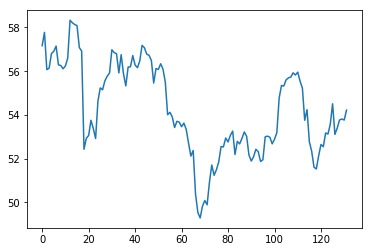

In [23]:
#df = df[['close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
plt.plot(df.ds, df.y)
plt.show()

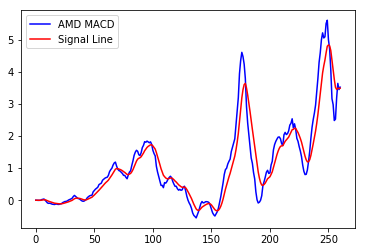

In [16]:
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.plot(df.ds, macd, label='AMD MACD', color = 'Blue')
plt.plot(df.ds, exp3, label='Signal Line', color='Red')
plt.legend(loc='upper left')
plt.show()

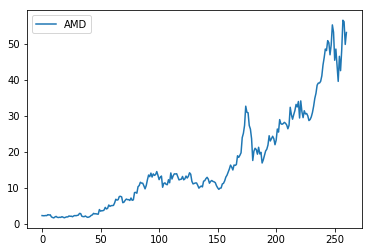

In [17]:
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
exp3 = df.y.ewm(span=9, adjust=False).mean()
macd = exp1-exp2
plt.plot(df.ds, df.y, label='AMD')
#plt.plot(df.ds, macd, label='AMD MACD', color='orange')
#plt.plot(df.ds, exp3, label='Signal Line', color='Magenta')
plt.legend(loc='upper left')
plt.show()

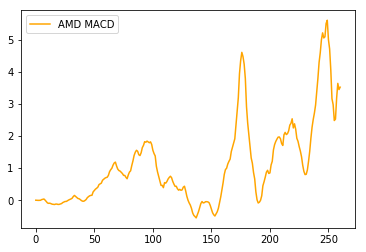

In [18]:
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
exp3 = df.y.ewm(span=9, adjust=False).mean()
macd = exp1-exp2
#plt.plot(df.ds, df.y, label='AMD')
plt.plot(df.ds, macd, label='AMD MACD', color='orange')
#plt.plot(df.ds, exp3, label='Signal Line', color='Magenta')
plt.legend(loc='upper left')
plt.show()